In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('/Users/riavoodi/Desktop/house_pricing_project/data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
missing_data = df.isnull().sum()
missing_data # calculating # of missing values in each column

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [16]:
missing_data_percentage = missing_data * 100 / len(df)
missing_values = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)
missing_values

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

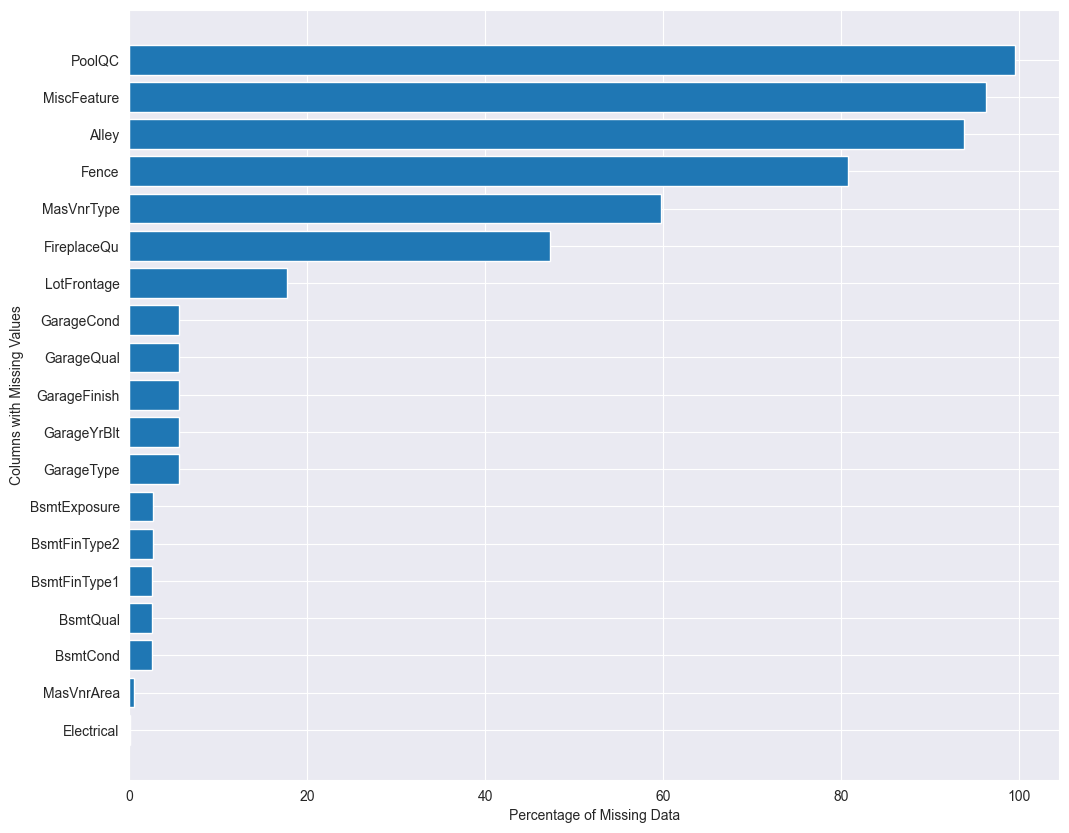

In [18]:
plt.figure(figsize = (12,10))
top_20_missing_cols = missing_values.head(20).sort_values(ascending = True)
plt.barh(top_20_missing_cols.index, top_20_missing_cols)
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Columns with Missing Values')
plt.show()

In [20]:
missing_analysis = []

for col in missing_values.head(20).index:
    analysis = {
        'Column': col,
        'Missing_Count': missing_data[col],
        'Missing_Pct': missing_values[col],
        'Data_Type': 'Categorical' if df[col].dtype == 'object' else 'Numeric'}

    if df[col].dtype == 'object':
        unique_vals = df[col].dropna().unique()
        analysis['Unique_Values'] = len(unique_vals)
        analysis['Sample_Values'] = list(unique_vals[:3])
    else:
        analysis['Min'] = df[col].min()
        analysis['Max'] = df[col].max()
        analysis['Mean'] = df[col].mean()

    missing_analysis.append(analysis)

In [22]:
df_filled = df.copy()

# Addressing features where missing = "None" (feature doesn't exist)
none_features = {
    'PoolQC': 'No pool',
    'MiscFeature': 'No miscellaneous feature',
    'Alley': 'No alley access',
    'Fence': 'No fence',
    'FireplaceQu': 'No fireplace',
    'GarageType': 'No garage',
    'GarageFinish': 'No garage',
    'GarageQual': 'No garage',
    'GarageCond': 'No garage',
    'BsmtQual': 'No basement',
    'BsmtCond': 'No basement',
    'BsmtExposure': 'No basement',
    'BsmtFinType1': 'No basement',
    'BsmtFinType2': 'No basement',
    'MasVnrType': 'No masonry veneer'}

for feature, reason in none_features.items():
    if feature in df_filled.columns and df_filled[feature].isnull().sum() > 0:
        before = df_filled[feature].isnull().sum()
        df_filled[feature] = df_filled[feature].fillna('None')



# Filling in missing values with 0
zero_features = [ 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

for feature in zero_features:
    if feature in df_filled.columns and df_filled[feature].isnull().sum() > 0:
        before = df_filled[feature].isnull().sum()
        df_filled[feature] = df_filled[feature].fillna(0)

# Replacing Garage Year with Year Built
if 'GarageYrBlt' in df_filled.columns:
    before = df_filled['GarageYrBlt'].isnull().sum()
    df_filled['GarageYrBlt'] = df_filled['GarageYrBlt'].fillna(df_filled['YearBuilt'])

# Replacing categorical variables with mode
categorical_cols = df_filled.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_filled[col].isnull().sum() > 0:
        before = df_filled[col].isnull().sum()
        mode_val = df_filled[col].mode()
        df_filled[col] = df_filled[col].fillna(mode_val)

# Replacing numeric variables with median
numeric_cols = df_filled.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_filled[col].isnull().sum() > 0:
        before = df_filled[col].isnull().sum()
        median_val = df_filled[col].median()
        df_filled[col] = df_filled[col].fillna(median_val)

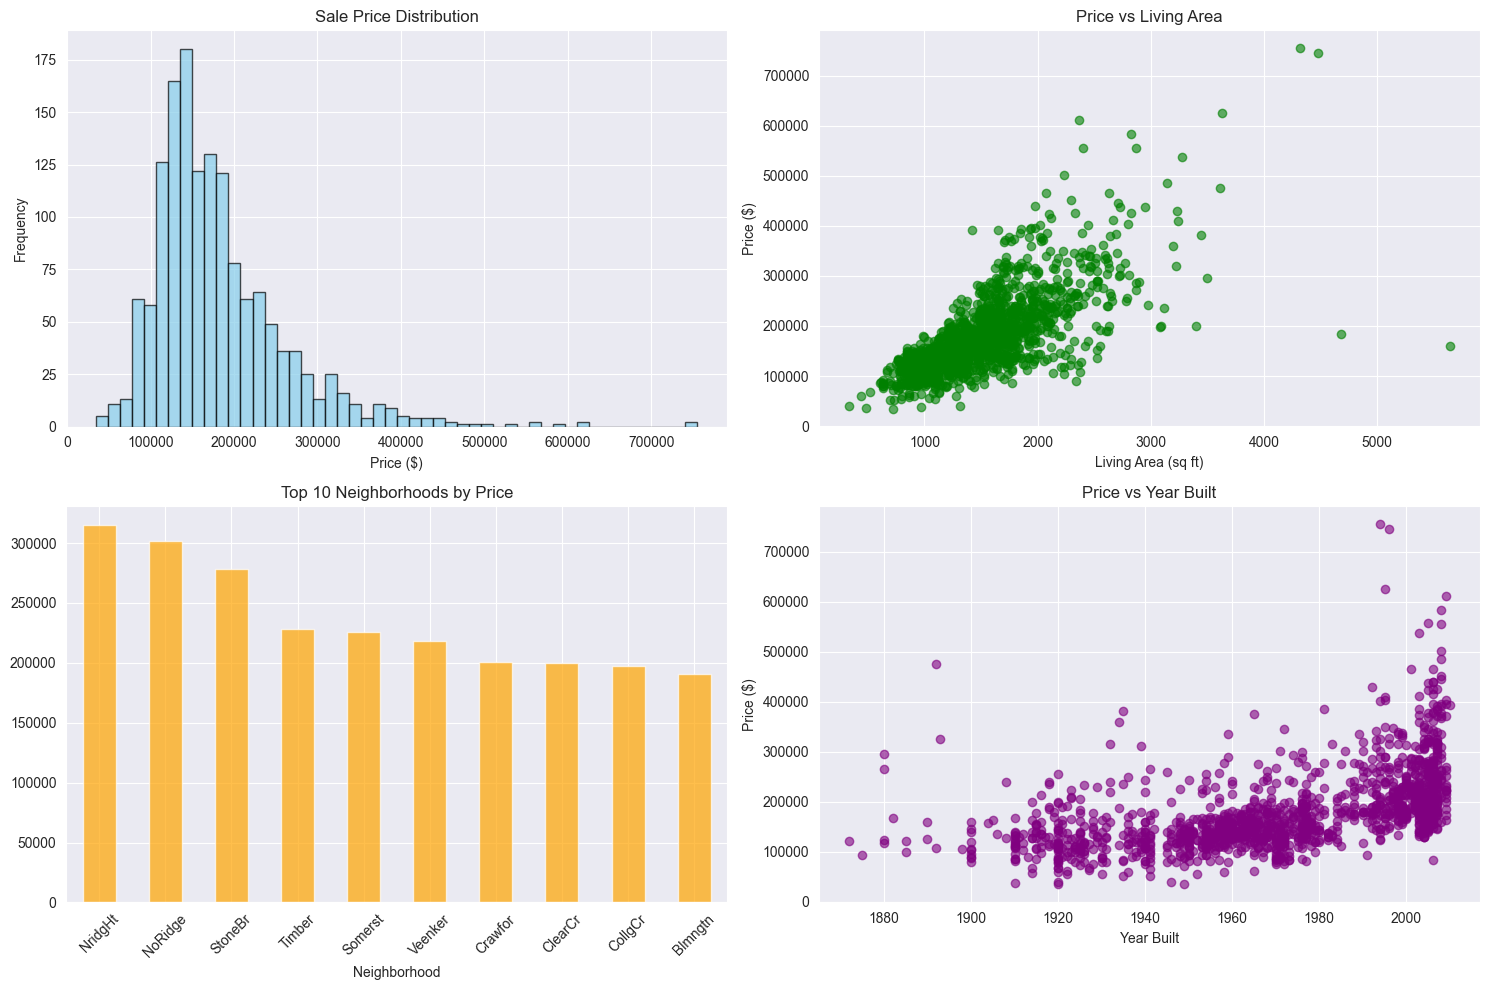

Mean: $180,921
Median: $163,000
Std Dev: $79,443
Skewness: 1.883
Min: $34,900
Max: $755,000


In [26]:
plt.figure(figsize=(15, 10))

# 1. Sale Price Distribution
plt.subplot(2, 2, 1)
plt.hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Sale Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# 2. Price vs Living Area
plt.subplot(2, 2, 2)
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.6, color='green')
plt.title('Price vs Living Area')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price ($)')

# 3. Top 10 Neighborhoods by Price
plt.subplot(2, 2, 3)
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)
neighborhood_prices.head(10).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 10 Neighborhoods by Price')
plt.xticks(rotation=45)

# 4. Price vs Year Built
plt.subplot(2, 2, 4)
plt.scatter(df['YearBuilt'], df['SalePrice'], alpha=0.6, color='purple')
plt.title('Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Statistics for the target variable
print(f"Mean: ${df['SalePrice'].mean():,.0f}")
print(f"Median: ${df['SalePrice'].median():,.0f}")
print(f"Std Dev: ${df['SalePrice'].std():,.0f}")
print(f"Skewness: {df['SalePrice'].skew():.3f}")
print(f"Min: ${df['SalePrice'].min():,.0f}")
print(f"Max: ${df['SalePrice'].max():,.0f}")

In [31]:
df = df_filled.copy()

# Age features
df['HouseAge'] = 2024 - df['YearBuilt']
df['YearsSinceRemodel'] = 2024 - df['YearRemodAdd']
df['IsRemodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)

# Area features
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Bathroom features
df['TotalBath'] = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['HalfBath'] + df['BsmtHalfBath'])

# Quality numeric conversion
quality_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
df['ExterQual_num'] = df['ExterQual'].map(quality_map)
df['KitchenQual_num'] = df['KitchenQual'].map(quality_map)

# Binary features
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
df['HasBasement'] = (df['TotalBsmtSF'] > 0).astype(int)
df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)

kept_features = [
    'TotalSF', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF',
    'OverallQual', 'OverallCond', 'ExterQual_num', 'KitchenQual_num',
    'HouseAge', 'YearsSinceRemodel',
    'TotalBath', 'GarageCars', 'GarageArea',
    'Fireplaces', 'HasBasement', 'HasGarage', 'LotArea'
]

# Create model-ready dataset
model_features = kept_features + ['SalePrice']
df_model = df[model_features]
df_model.to_csv('../data/df_model_ready.csv', index=False)